# 7. Integration

Given a function, $f$, and an interval $[a,b]$, we study the integral 

$$
  \int_a^b f(x)\,dx \equiv \lim_{N\to\infty}\sum_{n=0}^{N-1} f(x_n)dx
$$

where  $dx = (b-a)/N$ is the width of each of the $N$ subintervals and $x_n$ is the center of the $n$th subinterval

$$
  x_n = a + ndx + dx/2 = a + dx(n+1/2)
$$

For example, suppose $a=0$ and $b=1$ and $N=4$ so that each subinterval has length $dx = 1/4$ and their centers are at

$$
  x_0 = 1/8, \hskip 0.25in x_1 = 3/8, \hskip 0.25in x_2 = 5/8, \hskip 0.25in x_3 = 7/8.
$$

**The python cell below can be used to see and integrate any function over any interval.**


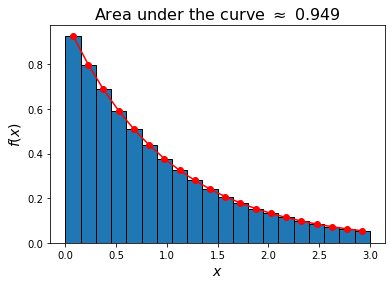

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(-x)    # specify the function you wish to integrate

a = 0   # left end
b = 3   # right end
N = 20  # number of subintervals
dx = (b-a)/N  # width of each subinterval
X = np.arange(a+dx/2,b,dx)   # create the array of subinterval centers, starting at a + dx/2, up to b, in increments of dx

plt.bar(X, f(X), width=dx, edgecolor = 'k')  # display the rectangles
plt.plot(X, f(X), 'ro-')   # place a black dot at each point
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)

sum = 0

for x in X:                    # careful, X is the array of x points
    sum = sum + f(x)*dx   # add up (height times width)
    
plt.title('Area under the curve $\\approx$ ' + str(np.round(sum,3)), fontsize=16);

This python code always works, but we often require explanations rather than mere numbers.

To that end, we explore how integration gets along with differentiation. In particular, we consider

$$
 \eqalign{\int_a^b f'(x)\,dx 
  &\approx \sum_{n=0}^{N-1} f'(x_n)dx \cr
  &\approx \sum_{n=0}^{N-1} \frac{f(a+(n+1)dx)-f(a+ndx)}{dx}dx \cr
  &  = \sum_{n=0}^{N-1} (f(a+(n+1)dx) - f(a+ndx)) \cr
  &= f(a+dx)-f(a) + f(a+2dx)-f(a+dx) + \cdots + f(a+(N-1)dx) - f(a+(N-2)dx + f(a+Ndx) - f(a+(N-1)dx) \cr
  &= f(b) - f(a) \cr}
$$

This result, after $N$ has indeed gone to $\infty$, is known as **The Fundamental Theorem of Calculus.**

$$
  \boxed{\int_a^b f'(x)\,dx = f(b) - f(a)}  \tag{FTC}
$$

Reviewing our steps, we see

- integration is a sum
- differentiation is a difference
- and, finally, the sum of differences is the difference of the two ends!

The practical effect of the (FTC) is that it reduces integration to differentiation (or anti-differentiation to be more exact).

I see it as a game of hangman. For example, consider

$$
  \int_0^\pi \cos(x)\,dx  = \int_0^\pi (???)'\,dx
$$

If I knew what $\cos$ was the derivative of I could simply complete the deal by the (FTC). But I do know that $\cos(x)=(\sin(x))'$ and so

$$  
  \int_0^\pi \cos(x)\,dx  = \int_0^\pi (\sin(x))'\,dx = \sin(\pi)-\sin(0) = 0 - 0 = 0.
$$

I recommend that you confirm this with our python integrator above. 

How about

$$
  \int_0^1 x^2\,dx  = \int_0^1 (???)'\,dx
$$

so here I need to find a function whose derivative is $x^2$. Please be careful, I am NOT asking for the derivative of $x^2$ but rather its anti-derivative. Don't get nervous about that anti, just know that is it there. Now, what kind of function has $x^2$ as its derivative? You know the power rule and so make the highly educated guess of $x^3$. But its derivative is $3x^2$, so in fact **the antiderivative of $x^2$ is $(1/3)x^3$**. Hence

$$
  \int_0^1 x^2\,dx  = \int_0^1 ((1/3)x^3)'\,dx = (1/3)(1^3)-(1/3)(0^3) = 1/3.
$$

Again, I strongly recommend that you confirm this with our python integrator.

To make progress we need a table of functions and their derivatives. Here $c$ and $A$ are constants

 | $f(x)$ | $f'(x)$ |
 | --- | --- |
 | $c$    |  $0$  |
 | $cx$   |  $c$   |
 | $cx^p$ | $cpx^{p-1}$ |
 | $A\sin(cx)$ | $Ac\cos(cx)$ |
 | $A\cos(cx)$ | $-Ac\sin(cx)$ |
 
 
Let's use this table to find

$$
  \int_0^\pi \sin(5x)\,dx = \int_0^\pi (???)'\,dx 
$$

we are asking if $\sin(5x)$ is the derivative of something, and our table reveals that is the derivative of $-(1/5)\cos(5x)$. That is, **$-(1/5)\cos(5x)$ is the antiderivative of $\sin(5x)$**. Hence

$$
  \int_0^\pi \sin(5x)\,dx = \int_0^\pi (-(1/5)\cos(5x))'\,dx = -(1/5)(\cos(5\pi)-\cos(0)) = 2/5
$$

We can now integrate any polynomial, for example,

$$
  \eqalign{\int_{-1}^1 (5x^4 - 7x^3 + 4x^2 - 6x + 12)\,dx 
  &= \int_{-1}^1 (x^5 - (7/4)x^4 + (4/3)x^3 - (6/2)x^2 + 12x)'\,dx \cr
  & = (1^5 - (7/4)1^4 + (4/3)1^3 - (6/2)1^2 + 12\cdot 1) - ((-1)^5 - (7/4)(-1)^4 + (4/3)(-1)^3 - (6/2)(-1)^2 + 12(-1)) \cr
  & = (1-(7/4)+(4/3)-3+12) - (-1-7/4-4/3-3-12) \cr
  & = 2 + (8/3) + 24 = 86/3 \cr}
$$

And, of course we can also handle fractional powers

$$
  \int_{-2}^2 \sqrt{2+x}\,dx = \int_{-2}^2 (2+x)^{1/2}\,dx = \int_{-2}^2 ((2/3)(2+x)^{3/2})'\,dx 
   = ((2/3)(2+2)^{3/2}) - ((2/3)(2-2)^{3/2}) = (2/3)4^{3/2} = (2/3)2^3 = 16/3
$$

And also negative powers, for example

$$
  \int_2^3 (4x-1)^{-2}\,dx = \int_2^3 ((-1/4)(4x-1)^{-1})'\,dx = (-1/4)(4(3)-1)^{-1}-(4(2)-1)^{-1})
   = (-1/4)(11^{-1}-7^{-1}) = \frac{1}{4}\left(\frac{1}{7}-\frac{1}{11}\right) = \frac{1}{77} \approx 0.013
$$

**Homework 7.** Submit a jupyter notebook of your complete solution to Exercises 1-12 in section 5.2 of our text. Please follow the logic we established in our examples above. I also recommend that you check your answers with our python integrator. 

